In [155]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

from sklearn import neural_network



# Reading data

In [156]:
col_names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
data1 = pd.read_csv('winequality-red.csv', names=col_names,delimiter=";")
data2 = pd.read_csv('winequality-white.csv', names=col_names,delimiter=";")

In [157]:
np_data1 =data1.as_matrix()
np_data2 =data2.as_matrix()
print "Red wine data shape: ", np_data1.shape
print "White wine data shape: ", np_data2.shape

Red wine data shape:  (1599L, 12L)
White wine data shape:  (4898L, 12L)


# Normalizing data

In [162]:
normalized_np_data1 = preprocessing.scale(np_data1[:,:10])
normalized_np_data2 = preprocessing.scale(np_data2[:,:10])

# Test_train splitting

In [163]:
x_train1, x_test1, y_train1, y_test1 = train_test_split( normalized_np_data1 , np_data1[:,-1] , test_size=0.25,stratify=np_data1[:,-1])
x_train2, x_test2, y_train2, y_test2 = train_test_split( normalized_np_data2 , np_data2[:,-1] , test_size=0.25,stratify=np_data2[:,-1])
print x_train1.shape
print y_train1.shape

(1199L, 10L)
(1199L,)


# Learning curves

In [24]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=3, n_jobs=2, train_sizes= np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [114]:
%%time
clf = neural_network.MLPClassifier(hidden_layer_sizes=(100,100,100,100,100), solver='sgd',alpha=0.0001 ,learning_rate="adaptive",max_iter=1000 )
plot_learning_curve( clf, "MLP",normalized_np_data1,np_data1[:,-1],cv=3 )

Wall time: 2min 37s


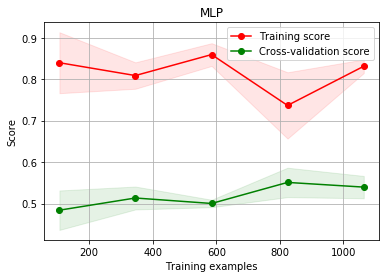

In [115]:
plt.show()

In [15]:
print np.linspace(0.1, 1.0, 5)

[ 0.1    0.325  0.55   0.775  1.   ]


# Evaluation

In [110]:
%%time
clf = neural_network.MLPClassifier(hidden_layer_sizes=(100,100,100,100,100), solver='sgd',alpha=0.0001 ,learning_rate="adaptive",max_iter=1000 )
clf.fit(x_train1,y_train1)

Wall time: 33.1 s


In [111]:
pred = clf.predict(x_test1)
tpred = clf.predict(x_train1)

In [112]:
print "Red Wine Test Accuracy: {:.2%}".format( accuracy_score(y_test1, pred)) 
print "Red Wine Training Accuracy: {:.2%}".format( accuracy_score(y_train1, tpred)) 

Red Wine Test Accuracy: 65.25%
Red Wine Training Accuracy: 91.58%


In [113]:
confusion_matrix(y_test1, pred )

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,  10,   2,   1,   0],
       [  0,   0, 131,  37,   2,   0],
       [  0,   1,  43, 101,  15,   0],
       [  0,   0,   3,  18,  29,   0],
       [  0,   0,   1,   3,   1,   0]])

# Hyperparameters tunning

In [186]:
mlp = neural_network.MLPClassifier()
param_grid = [{'solver':["lbfgs","sgd","adam"],'hidden_layer_sizes': [(100,), (14,14), (100,100,100,100,100)],"max_iter":[200, 500, 1000]}]

In [187]:
%%time
clf = GridSearchCV(mlp, param_grid)
clf.fit(normalized_np_data1, np_data1[:,-1])

Wall time: 5min 30s


In [185]:
clf.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(14, 14), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# Lets test the best parameters

In [182]:
mlp = neural_network.MLPClassifier(activation='relu', solver = "lbfgs", alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), shuffle=False, learning_rate_init=0.001, max_iter=200 )
mlp.fit( x_train1,y_train1 )

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=False, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [183]:
pred = mlp.predict(x_test1)
tpred = mlp.predict(x_train1)

In [184]:
print "Red Wine Test Accuracy: {:.2%}".format( accuracy_score(y_test1, pred)) 
print "Red Wine Training Accuracy: {:.2%}".format( accuracy_score(y_train1, tpred)) 

Red Wine Test Accuracy: 62.75%
Red Wine Training Accuracy: 99.67%


# Lets take top 4 features from feature engineering

In [190]:
x =data1[[ 'sulphates', 'density', 'total sulfur dioxide', 'volatile acidity']].as_matrix()
x_normalized =  preprocessing.scale(x)

In [193]:
x_train1, x_test1, y_train1, y_test1 = train_test_split( x_normalized , np_data1[:,-1] , test_size=0.25,stratify=np_data1[:,-1])

In [194]:
mlp = neural_network.MLPClassifier(activation='relu', solver = "lbfgs", alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), shuffle=False, learning_rate_init=0.001, max_iter=200 )
mlp.fit( x_train1,y_train1 )

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=False, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [195]:
pred = mlp.predict(x_test1)
tpred = mlp.predict(x_train1)

In [196]:
print "Red Wine Test Accuracy: {:.2%}".format( accuracy_score(y_test1, pred)) 
print "Red Wine Training Accuracy: {:.2%}".format( accuracy_score(y_train1, tpred)) 

Red Wine Test Accuracy: 61.75%
Red Wine Training Accuracy: 85.90%
